In [1]:
# Training on colab gpu
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Custom_Emojify/src/models/tfidf

Mounted at /content/gdrive
/content/gdrive/MyDrive/Custom_Emojify/src/models/tfidf


In [17]:
from importlib import reload
import numpy as np
import pandas as pd

import tfidf_model
import config_tfidf

%cd /content/gdrive/MyDrive/Custom_Emojify
from src.utils import pre_processing
reload(pre_processing)
%cd /content/gdrive/MyDrive/Custom_Emojify/src/models/tfidf
reload(tfidf_model)
reload(config_tfidf)
reload(pre_processing)


/content/gdrive/MyDrive/Custom_Emojify
/content/gdrive/MyDrive/Custom_Emojify/src/models/tfidf


<module 'src.utils.pre_processing' from '/content/gdrive/MyDrive/Custom_Emojify/src/utils/pre_processing.py'>

In [10]:
df = pd.read_csv(config_tfidf.path_gdrive, index_col=[0])
df.Text = df.Text.apply(lambda row: pre_processing.remove_extra_spaces(row)) # remove extra spaces
df.Text = df.Text.apply(lambda row: pre_processing.hashtag_mentions_removal(row)) # Remove mentions & hashtags
(X_train, y_train), (X_val, y_val), (X_test, y_test) = pre_processing.load_and_split(df, 
                                                                                    train_ratio=0.7, 
                                                                                    validation_ratio=0.2,
                                                                                    test_ratio=0.1)

Shape of X_train: (176507,)
Shape of y_train: (176507, 14)

Shape of X_val: (50431,)
Shape of y_val: (50431, 14)

Shape of X_test: (25216,)
Shape of y_test: (25216, 14)


In [19]:
dir = '/content/gdrive/MyDrive/model_weights'
model = tfidf_model.TfidfModel(dir=dir)
model.build(X_train)
model.summary()

Model Successfully Built
Model: "Tfidf_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 50000)            1         
 ectorization)                                                   
                                                                 
 Dense1 (Dense)              (None, 1024)              51201024  
                                                                 
 batch_normalization_16 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 1024)              0         
                                                                 
 dropout1 (Dropout)          (

In [15]:
epochs=50
learning_rate=0.0085
batch_size=128

history=model.train(X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, val_model=True)

Epoch 1/50
1379/1379 [==============================] - 19s 13ms/step - loss: 2.8686 - categorical_accuracy: 0.2960 - val_loss: 2.3980 - val_categorical_accuracy: 0.3337 - lr: 0.0085
Epoch 2/50
1379/1379 [==============================] - 19s 14ms/step - loss: 2.2729 - categorical_accuracy: 0.3575 - val_loss: 2.2367 - val_categorical_accuracy: 0.3383 - lr: 0.0085
Epoch 3/50
1379/1379 [==============================] - 18s 13ms/step - loss: 2.0950 - categorical_accuracy: 0.3868 - val_loss: 2.1885 - val_categorical_accuracy: 0.3449 - lr: 0.0085
Epoch 4/50
1379/1379 [==============================] - 18s 13ms/step - loss: 2.0004 - categorical_accuracy: 0.4130 - val_loss: 2.2164 - val_categorical_accuracy: 0.3463 - lr: 0.0085
Epoch 5/50
1379/1379 [==============================] - 18s 13ms/step - loss: 1.8981 - categorical_accuracy: 0.4458 - val_loss: 2.2188 - val_categorical_accuracy: 0.3439 - lr: 0.0085
Epoch 6/50
 348/1379 [======>.......................] - ETA: 11s - loss: 1.7390 - cat

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
generate_plots(history=history)

Let's adjust some parameters and re-try this

In [ ]:
model.reset_weights()
epochs=25
learning_rate=0.00045
batch_size=256

history2=model.train(X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, val_model=True)
generate_plots(history=history2)

Weights Reset
Epoch 1/25
1379/1379 [==============================] - 19s 12ms/step - loss: 2.1694 - categorical_accuracy: 0.2944 - val_loss: 1.9829 - val_categorical_accuracy: 0.3512 - lr: 5.5000e-04
Epoch 2/25
1379/1379 [==============================] - 17s 12ms/step - loss: 1.8907 - categorical_accuracy: 0.3833 - val_loss: 1.9710 - val_categorical_accuracy: 0.3561 - lr: 5.5000e-04
Epoch 3/25
1379/1379 [==============================] - 16s 12ms/step - loss: 1.7300 - categorical_accuracy: 0.4365 - val_loss: 2.0050 - val_categorical_accuracy: 0.3528 - lr: 5.5000e-04
Epoch 4/25
1379/1379 [==============================] - 16s 12ms/step - loss: 1.5569 - categorical_accuracy: 0.4906 - val_loss: 2.1024 - val_categorical_accuracy: 0.3422 - lr: 5.5000e-04
Epoch 5/25
1379/1379 [==============================] - 17s 12ms/step - loss: 1.3819 - categorical_accuracy: 0.5486 - val_loss: 2.2231 - val_categorical_accuracy: 0.3394 - lr: 5.5000e-04
Epoch 6/25
1379/1379 [=============================

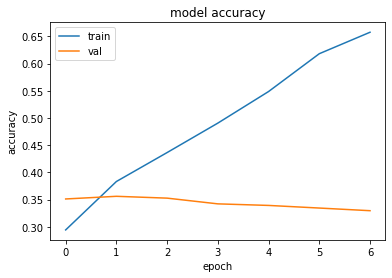

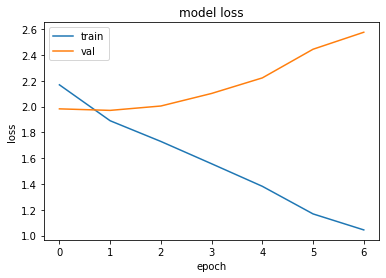

In [17]:
model.reset_weights()
epochs=25
learning_rate=0.00055
batch_size=128

history3=model.train(X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, val_model=True)
generate_plots(history=history3)

### Let's combine the training + validation data into one training set and then re-train for around 4 - 5 epochs and save the model to evaluate performance with.

In [21]:
model.reset_weights()
epochs=3
learning_rate=0.00075
batch_size=128

hist_final=model.train(X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, val_model=False) # val mode false combines the training + val data into just training

Weights Reset
Epoch 1/3
1773/1773 [==============================] - ETA: 0s - loss: 3.1379 - categorical_accuracy: 0.3387

1773/1773 [==============================] - 43s 24ms/step - loss: 3.1379 - categorical_accuracy: 0.3387 - lr: 7.5000e-04
Epoch 2/3
1771/1773 [============================>.] - ETA: 0s - loss: 2.2196 - categorical_accuracy: 0.4116

1773/1773 [==============================] - 42s 24ms/step - loss: 2.2196 - categorical_accuracy: 0.4115 - lr: 7.5000e-04
Epoch 3/3
1772/1773 [============================>.] - ETA: 0s - loss: 2.0048 - categorical_accuracy: 0.4739

1773/1773 [==============================] - 43s 24ms/step - loss: 2.0049 - categorical_accuracy: 0.4739 - lr: 7.5000e-04


In [23]:
model.test(x=X_test, y=y_test, batch_size=batch_size)

197/197 [==============================] - 3s 13ms/step - loss: 2.3750 - categorical_accuracy: 0.3412


[2.375019073486328, 0.3411722779273987]

We've received ~34% categorical accuracy

In [25]:
pred = model.predict(x=['Lets goooo beautiful day outside'])

1/1 [==============================] - 0s 25ms/step


In [28]:
np.argmax(pred)

6

In [31]:
model.Model.save('/content/gdrive/MyDrive/Custom_Emojify', save_format="tf")

In [32]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Custom_Emojify')

In [35]:
np.argmax(loaded_model.predict(x=['Lets gooo beautiful day outside']))

1/1 [==============================] - 0s 26ms/step


6

In [36]:
loaded_model.evaluate(X_test, y_test, 128)

197/197 [==============================] - 3s 12ms/step - loss: 2.3750 - categorical_accuracy: 0.3412


[2.375018835067749, 0.3411722779273987]